In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from src.preprocessing import clean_resume, extract_features, label_encode_categories
from src.train_evaluate import train_model, evaluate_model

In [2]:
resumeDataset = pd.read_csv('resumes.csv')

In [3]:
resumeDataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


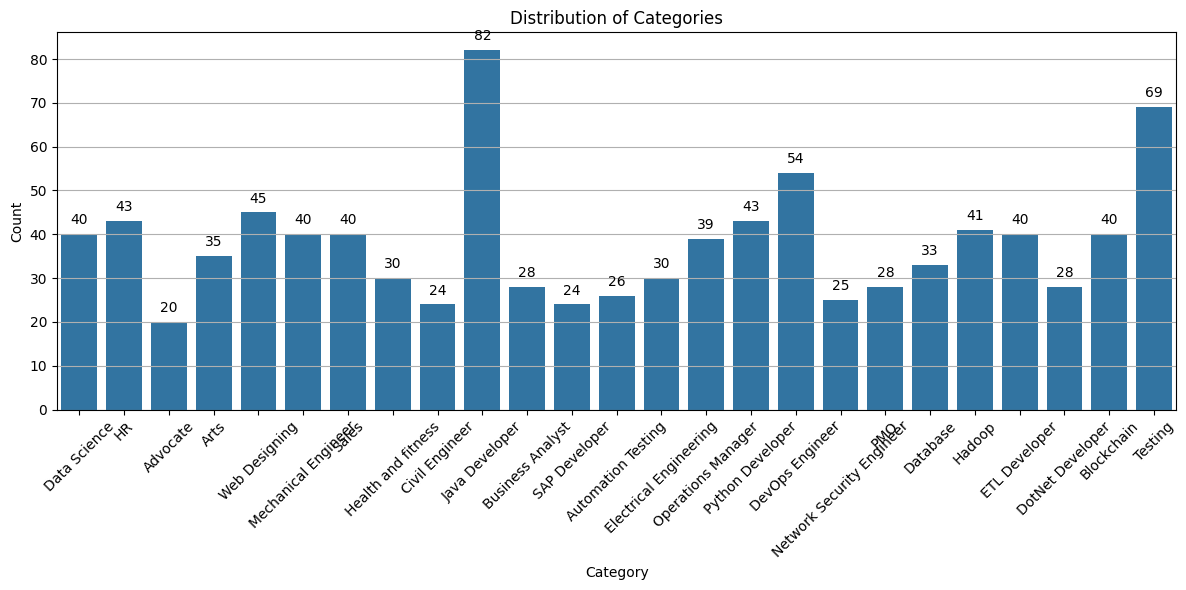

In [4]:
plt.figure(figsize=(12, 6))  # Set figure size

# Create the countplot with seaborn
ax = sns.countplot(x="Category", data=resumeDataset)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Categories')  # Add title
plt.xlabel('Category')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.grid(axis='y')  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [5]:
# Clean resume text
resumeDataset['cleaned_resume'] = resumeDataset.Resume.apply(lambda x: clean_resume(x))
resumeDataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [6]:
# Label encoding
required_target = label_encode_categories(resumeDataset['Category'])

In [7]:
# Extract features
required_text = resumeDataset['cleaned_resume'].values
WordFeatures = extract_features(required_text)

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, required_target, random_state=0, test_size=0.2)

In [9]:
print(X_train)
print(y_train)

  (0, 1298)	0.06689647533667233
  (0, 1297)	0.06339140789345901
  (0, 1289)	0.08483419767128576
  (0, 1288)	0.036214972997241295
  (0, 1284)	0.07022850915388915
  (0, 1281)	0.045418554027300495
  (0, 1257)	0.07309349903802005
  (0, 1255)	0.08050058763956672
  (0, 1243)	0.08343641825573356
  (0, 1242)	0.08794892751431864
  (0, 1235)	0.03156245055373827
  (0, 1208)	0.11575901212813783
  (0, 1175)	0.033132472902964186
  (0, 1108)	0.08089537810794742
  (0, 1100)	0.06626089865340429
  (0, 1094)	0.033013472348735584
  (0, 1093)	0.02072587292329145
  (0, 1080)	0.07724989050642847
  (0, 1077)	0.07170955856061315
  (0, 1063)	0.0903201819139377
  (0, 1045)	0.07071052792370025
  (0, 1036)	0.05297610086187683
  (0, 1035)	0.2820582837169129
  (0, 1017)	0.14051544157633994
  (0, 1007)	0.0515738163114469
  :	:
  (756, 319)	0.08059634386366477
  (756, 296)	0.08401747906436843
  (756, 280)	0.08216851894278004
  (756, 277)	0.09492076387344545
  (756, 273)	0.12653714755743456
  (756, 244)	0.0828290724477

In [10]:
# Train model
clf = train_model(X_train, y_train)

In [11]:
# Evaluate model
evaluate_model(clf, X_test, y_test)


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [31]:
predictions = clf.predict(X_test)
# Print the original labels and encoded predictions
print("Original Label    Encoded Prediction")
for orig, pred in zip(y_test, predictions):
    print(f"{orig:<16} {pred}")

Original Label    Encoded Prediction
3                3
20               20
22               22
15               15
11               11
19               19
9                9
17               17
6                6
6                6
23               23
9                9
3                3
11               11
22               22
16               16
8                8
16               16
10               10
5                5
3                3
15               15
10               10
15               15
12               12
20               20
21               21
15               15
15               15
20               20
8                8
23               23
18               18
23               23
0                0
11               11
4                4
16               16
15               15
19               19
15               15
13               13
14               14
21               21
15               15
16               16
15               15
15               15
16             

It produces 99% accuracy, lets try this on a new file.

In [15]:
# Predict category for a new resume

#Load new resume from a csv file
new = pd.read_csv('new.csv')
new['cleaned_resume'] = new.Resume.apply(lambda x: clean_resume(x))
text = new['cleaned_resume'].values
Features = extract_features(text)
new_resume = Features[0]

#Or you can add new resume as text
#new_text = ["..."]
#Features = extract_features(new_text)
#new_resume = Features[0]

predicted_category = clf.predict(new_resume)
print("Predicted Category:", predicted_category)

Predicted Category: [18]
